Linear Regression sử dụng Gradient Descent

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

c:\Users\NC.DESKTOP-8TG1B6T\Envs\learnML\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  """


In [2]:
# n: số lượng dữ liệu 
n = 20
X = np.random.randint(low=20, high=150, size=n).reshape(-1, 1)
print(X)

[[ 77]
 [ 99]
 [ 34]
 [ 71]
 [147]
 [ 32]
 [ 73]
 [ 60]
 [123]
 [ 21]
 [ 85]
 [ 24]
 [134]
 [115]
 [ 57]
 [ 32]
 [106]
 [ 71]
 [130]
 [ 64]]


In [3]:
noise = np.random.normal(0, 1, n).reshape(-1, 1)
print(noise)

[[-0.86164147]
 [-0.35133451]
 [ 1.43835497]
 [ 0.1188703 ]
 [ 0.14866403]
 [-1.06141219]
 [ 2.26740427]
 [-0.283834  ]
 [ 1.35004319]
 [ 0.19807222]
 [ 0.53078251]
 [-0.75935843]
 [ 0.07783196]
 [-0.35833196]
 [ 0.28119457]
 [ 1.3160921 ]
 [-1.11829298]
 [-0.66417288]
 [ 0.43900638]
 [ 0.3119361 ]]


In [4]:
y = 15*X + 8 + 25*noise
print(y)

[[1141.45896337]
 [1484.21663714]
 [ 553.95887422]
 [1075.97175757]
 [2216.71660079]
 [ 461.46469535]
 [1159.68510667]
 [ 900.90414989]
 [1886.75107982]
 [ 327.95180545]
 [1296.26956269]
 [ 349.01603924]
 [2019.94579898]
 [1724.0417011 ]
 [ 870.02986431]
 [ 520.90230252]
 [1570.04267547]
 [1056.39567811]
 [1968.9751594 ]
 [ 975.79840252]]


In [5]:
one = np.ones(n, dtype=int).reshape(-1,1)
X = np.concatenate((one, X), axis=1)
print(X)

[[  1  77]
 [  1  99]
 [  1  34]
 [  1  71]
 [  1 147]
 [  1  32]
 [  1  73]
 [  1  60]
 [  1 123]
 [  1  21]
 [  1  85]
 [  1  24]
 [  1 134]
 [  1 115]
 [  1  57]
 [  1  32]
 [  1 106]
 [  1  71]
 [  1 130]
 [  1  64]]


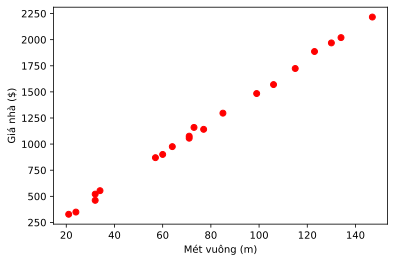

In [11]:
plt.scatter(X[:, 1], y, c='red')
plt.xlabel('Mét vuông (m)')
plt.ylabel('Giá nhà ($)')
plt.show()

In [7]:
def predict(w, X): 
  return np.dot(X, w)

In [8]:
# khởi tạo giá trị tham số cho gradient descent
w = np.array([[0.], [1.]])
print(w)

[[0.]
 [1.]]


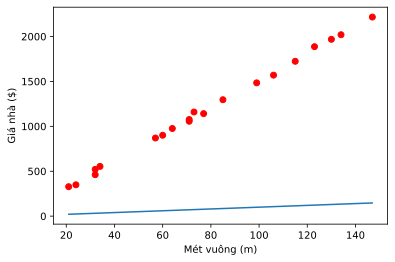

In [12]:
y_pred = predict(w, X)
plt.plot(X[:, 1], y_pred)
plt.scatter(X[:, 1], y, c='red')
plt.xlabel('Mét vuông (m)')
plt.ylabel('Giá nhà ($)')
plt.show()

In [14]:
def MSELoss(y_pred, y):
  return 0.5* np.sum((y_pred-y)**2)

def gradient_descent(lr, epochs, w, threshold):
  history = []
  for i in range(epochs):
    w = w - lr * np.dot(X.T, predict(w, X)-y)
    loss = MSELoss(predict(w, X), y)
    print(f'epochs {i + 1}: w = {w}, loss = {loss}')
    history.append(loss)
    if loss <= threshold: return w
  
  return w, np.array(history)

In [15]:
learning_rate = 0.000001
epochs = 50
threshold = 1e-6

w, history = gradient_descent(learning_rate, epochs, w, threshold)

epochs 1: w = [[0.0220055 ]
 [3.11236812]], loss = 10791086.24433713
epochs 2: w = [[0.04072582]
 [4.90871921]], loss = 7805260.29281082
epochs 3: w = [[0.05665245]
 [6.43633042]], loss = 5645986.276074307
epochs 4: w = [[0.07020332]
 [7.73540608]], loss = 4084453.7703167032
epochs 5: w = [[0.08173385]
 [8.84013585]], loss = 2955192.848362498
epochs 6: w = [[0.0915463 ]
 [9.77959447]], loss = 2138539.8325546887
epochs 7: w = [[ 0.0998977 ]
 [10.57850703]], loss = 1547956.969509179
epochs 8: w = [[ 0.10700662]
 [11.25789968]], loss = 1120862.338735167
epochs 9: w = [[ 0.11305894]
 [11.83565296]], loss = 811998.2738482124
epochs 10: w = [[ 0.11821274]
 [12.32697246]], loss = 588635.5720609594
epochs 11: w = [[ 0.12260243]
 [12.74478892]], loss = 427105.299451885
epochs 12: w = [[ 0.12634233]
 [13.10009866]], loss = 310290.68001451716
epochs 13: w = [[ 0.12952964]
 [13.40225285]], loss = 225813.29308035006
epochs 14: w = [[ 0.13224705]
 [13.65920376]], loss = 164721.3770449462
epochs 15: 

In [16]:
print(w)

[[ 0.14905129]
 [15.11551344]]


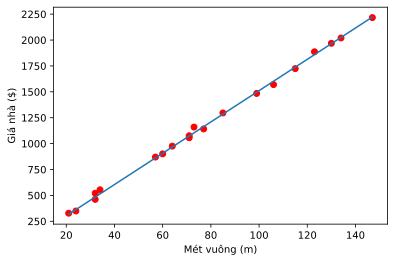

In [17]:
y_pred = predict(w, X)
plt.plot(X[:, 1], y_pred)
plt.scatter(X[:, 1], y, c='red')
plt.xlabel('Mét vuông (m)')
plt.ylabel('Giá nhà ($)')
plt.show()

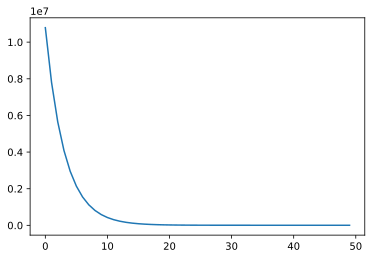

In [18]:
plt.plot(history)
plt.show()

Giả sử dữ liệu có dạng hàm bậc 2 như dưới đây: sử dụng poly regression

In [19]:
data = pd.read_csv('data\data_square.csv')

In [20]:
print(data.head())

   Diện tích  Giá nhà
0    30.0000 -100.000
1    32.4138 -190.725
2    34.8276 -269.798
3    37.2414 -337.218
4    39.6552 -392.985


In [21]:
X = data.iloc[:, 0].values.reshape(-1, 1)
print(X)

[[ 30.    ]
 [ 32.4138]
 [ 34.8276]
 [ 37.2414]
 [ 39.6552]
 [ 42.069 ]
 [ 44.4828]
 [ 46.8966]
 [ 49.3103]
 [ 51.7241]
 [ 54.1379]
 [ 56.5517]
 [ 58.9655]
 [ 61.3793]
 [ 63.7931]
 [ 66.2069]
 [ 68.6207]
 [ 71.0345]
 [ 73.4483]
 [ 75.8621]
 [ 78.2759]
 [ 80.6897]
 [ 83.1034]
 [ 85.5172]
 [ 87.931 ]
 [ 90.3448]
 [ 92.7586]
 [ 95.1724]
 [ 97.5862]
 [100.    ]]


In [22]:
y = data.iloc[:, -1].values.reshape(-1, 1)
print(y)

[[-100.    ]
 [-190.725 ]
 [-269.798 ]
 [-337.218 ]
 [-392.985 ]
 [-437.099 ]
 [-469.56  ]
 [-490.369 ]
 [-499.524 ]
 [-497.027 ]
 [-482.878 ]
 [-457.075 ]
 [-419.62  ]
 [-370.511 ]
 [-309.75  ]
 [-237.337 ]
 [-153.27  ]
 [ -57.5505]
 [  49.8216]
 [ 168.847 ]
 [ 299.524 ]
 [ 441.855 ]
 [ 595.838 ]
 [ 761.474 ]
 [ 938.763 ]
 [1127.71  ]
 [1328.3   ]
 [1540.55  ]
 [1764.45  ]
 [2000.    ]]


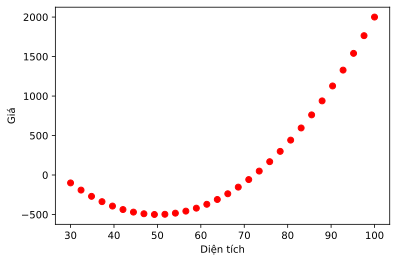

In [23]:
plt.scatter(X, y, color='red')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

=> công thức giá nhà dự đoán theo diện tích: giá = w0 + w1 * diện tích + w2 * diện tích ** 2

In [24]:
# khởi tạo giá trị cho tham số 
w = np.array([1000., -50., 0.5]).reshape(-1, 1)
print(w)

[[ 1.e+03]
 [-5.e+01]
 [ 5.e-01]]


In [25]:
one = np.ones((np.shape(X)[0], 1))
X_square = np.array(X**2)
X = np.concatenate((one, X, X_square), axis=1)
print(X)

[[1.00000000e+00 3.00000000e+01 9.00000000e+02]
 [1.00000000e+00 3.24138000e+01 1.05065443e+03]
 [1.00000000e+00 3.48276000e+01 1.21296172e+03]
 [1.00000000e+00 3.72414000e+01 1.38692187e+03]
 [1.00000000e+00 3.96552000e+01 1.57253489e+03]
 [1.00000000e+00 4.20690000e+01 1.76980076e+03]
 [1.00000000e+00 4.44828000e+01 1.97871950e+03]
 [1.00000000e+00 4.68966000e+01 2.19929109e+03]
 [1.00000000e+00 4.93103000e+01 2.43150569e+03]
 [1.00000000e+00 5.17241000e+01 2.67538252e+03]
 [1.00000000e+00 5.41379000e+01 2.93091222e+03]
 [1.00000000e+00 5.65517000e+01 3.19809477e+03]
 [1.00000000e+00 5.89655000e+01 3.47693019e+03]
 [1.00000000e+00 6.13793000e+01 3.76741847e+03]
 [1.00000000e+00 6.37931000e+01 4.06955961e+03]
 [1.00000000e+00 6.62069000e+01 4.38335361e+03]
 [1.00000000e+00 6.86207000e+01 4.70880047e+03]
 [1.00000000e+00 7.10345000e+01 5.04590019e+03]
 [1.00000000e+00 7.34483000e+01 5.39465277e+03]
 [1.00000000e+00 7.58621000e+01 5.75505822e+03]
 [1.00000000e+00 7.82759000e+01 6.127116

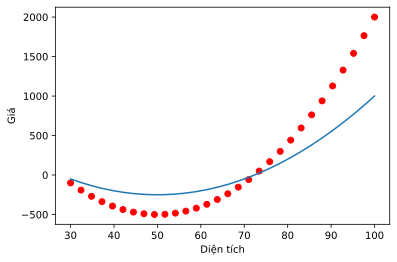

In [26]:
plt.scatter(X[:,1], y, color='red')
plt.plot(X[:, 1], predict(w, X))
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

In [27]:
learning_rate = 1e-9
epochs = 100
threshold = 1e5

w, history = gradient_descent(learning_rate, epochs, w, threshold)

epochs 1: w = [[ 1.00000000e+03]
 [-4.99996461e+01]
 [ 5.39105788e-01]], loss = 1282567.5968913764
epochs 2: w = [[ 9.99999999e+02]
 [-4.99997143e+01]
 [ 5.43882824e-01]], loss = 1269754.4504900961
epochs 3: w = [[ 9.99999996e+02]
 [-4.99998341e+01]
 [ 5.44467575e-01]], loss = 1269547.4728285458
epochs 4: w = [[ 9.99999992e+02]
 [-4.99999601e+01]
 [ 5.44540356e-01]], loss = 1269528.5001831811
epochs 5: w = [[ 9.99999988e+02]
 [-5.00000869e+01]
 [ 5.44550615e-01]], loss = 1269512.331618125
epochs 6: w = [[ 9.99999984e+02]
 [-5.00002139e+01]
 [ 5.44553238e-01]], loss = 1269496.205099677
epochs 7: w = [[ 9.99999980e+02]
 [-5.00003408e+01]
 [ 5.44554929e-01]], loss = 1269480.0794356558
epochs 8: w = [[ 9.99999977e+02]
 [-5.00004677e+01]
 [ 5.44556506e-01]], loss = 1269463.95401173
epochs 9: w = [[ 9.99999973e+02]
 [-5.00005946e+01]
 [ 5.44558069e-01]], loss = 1269447.8288187338
epochs 10: w = [[ 9.99999969e+02]
 [-5.00007215e+01]
 [ 5.44559630e-01]], loss = 1269431.7038565278
epochs 11: w 

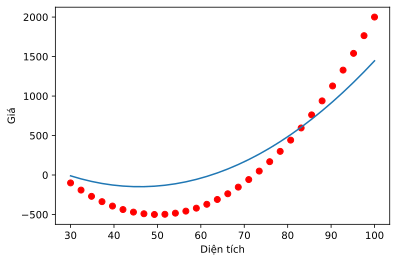

In [28]:
plt.scatter(X[:,1], y, color='red')
plt.plot(X[:, 1], predict(w, X))
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X, y)

LinearRegression()

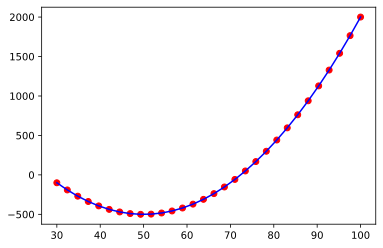

In [30]:
plt.scatter(X[:, 1], y, color='red')
plt.plot(X[:, 1], lr2.predict(X), color='blue')

plt.show()

In [88]:
lr2.coef_

array([[   0.        , -100.00022214,    1.00000199]])

In [104]:
print(MSELoss(lr2.predict(X), y))

3.909747005493193e-05
